## Section 1: Business Understanding

Looking at the happiness index from the Kaggle dataset "https://www.kaggle.com/unsdsn/world-happiness"
This dataset is from 2015 - 2019. Countries are ranked by happiness and factors that contribute to a happiness score. 

I wanted to take a look at what factors cause people to respond as being happy. The happiness survey is a survey done for eacxh country which presents a few metrics and shows how these metrics influence the happiness score. By Analysing the data I wanted to see if factors influencing happiness stay constant through time as well as look at the size of impact. Can happiness be predicted and what do people need in order to be happy?

There are 6 main factors:
Perception of government trust
Generosity
GDP per capita
Health/life expectancy
Social Support
Freedom to make life choices

For the purpose of the assignment I would like to answer the following:

    1. Do the expanatory variables change in effect over time?
    2  By combining all the years into one dataset what are the major factors.
    3  How does wealth compare to generosity and social support.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



## Section 2: Data Understanding

Load in all the files and check data sets. Checking the columns in the data so that we can make them uniform and discard the columns not needed in each dataframe to gather the data.

Look at the data size and the columns.

In [2]:
list_of_docs = ['./2015.csv', './2016.csv', './2017.csv', './2018.csv', './2019.csv' ]

#Loop through each file and create a dataframe list, add in a date column for each
dfs = []
year = 2015

for file_name in list_of_docs:
    df = pd.read_csv(file_name)
    df.insert(0, 'Year', year)
    dfs.append(df)
    year += 1
    

# Create a function so I can look at the heads of dataframes in a list
def df_loop_head(dfs, num=5):
    ''' This function goes through each of the dataframes in the list and shows the top 10 records for each'''
    for df in dfs:
        display(df.head(num))


df_loop_head(dfs)


,Year,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2016,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


,Year,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,2017,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2017,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2017,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,2017,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,2017,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Create a function to go through the shape (rows and columns) of each dataframe in the list. 
# I ve created a dictionary to see the value for each year

def df_loop_shape(dfs):
    ''' This function goes through each of the dataframes in the list and  provides the shape (rows and columns)'''
    dict = {}
    for df in dfs:
        dict[df.iloc[0,0]] = df.shape
    display(dict)
    
df_loop_shape(dfs)

{2015: (158, 13),
 2016: (157, 14),
 2017: (155, 13),
 2018: (156, 10),
 2019: (156, 10)}

The columns can be mapped for each year. The number of countries repsonding appears to be around 155 to 158 so I am assuming we can compare these datatsets. There are some statistical columns which can be removed for my analysis as they are different for each year. Some of the columns are not an exact match but I will assume the intention of the survey is to capture the same idea behind the metric. The is Social Support and Freedom to make life choices.

For my purposes we wont be looking at country, the rest of the explanantory variables are floats.

looking at the descriptive stats for each dataset

In [4]:
for df in dfs:
    display(df.describe())


,Year,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,2015.0,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.0,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2015.0,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.0,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,2015.0,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,2015.0,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,2015.0,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


,Year,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,2016.0,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.0,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,2016.0,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,2016.0,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,2016.0,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,2016.0,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,2016.0,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Year,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.0,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2017.0,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,0.0,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,2017.0,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,2017.0,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,2017.0,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,2017.0,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,2017.0,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,2018.0,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,0.0,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,2018.0,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,2018.0,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,2018.0,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,2018.0,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2019.0,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.0,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2019.0,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,2019.0,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,2019.0,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,2019.0,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Section 3: Preparing the data

Overall Ranking doesnt assist with the analysis as we only want to see variables impacting score
The statistic metrics dont assist with the analysis so can be dropped. 

In [5]:
dfs[0] = dfs[0].drop(columns = ['Happiness Rank', 'Region', 'Standard Error', 'Dystopia Residual'])
dfs[1] = dfs[1].drop(columns = ['Happiness Rank', 'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
dfs[2] = dfs[2][['Year','Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
                         'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
dfs[3] = dfs[3][['Year','Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]
dfs[4] = dfs[4][['Year','Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]


# Check for missing values in columns
for df in dfs:
    print(df.isna().sum())


Year                             0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64
Year                             0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64
Year                             0
Country                          0
Happiness.Score                  0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Trust..Government.Corruption.    0
Generosity                       0
dtype: int64
Year            

I've checked for missing values above

There is one missing variable from 2018 on the perception if corruption. I ve taken the mean of that column since the standard deviation is quite low

Check how the missing value is spread for that dataframe

array([[<AxesSubplot:title={'center':'Perceptions of corruption'}>]],
      dtype=object)

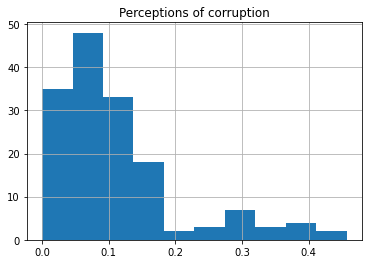

In [6]:
dfs[3].hist(column='Perceptions of corruption')

There is only one missing value. The data is skewed towards lower level of govt corruption perception so the mean would be appropriate to use in this case as opposed to the median.

In [7]:
dfs[3].fillna(dfs[3].mean(), inplace=True)

# Check all missing values have been imputed
for df in dfs:
    print(df.isna().sum().sum())

0
0
0
0
0


Rename the columns so that each dataset matches. I will map the columns to the 2018 and 2019 labels. So I can compare datasets easily as well as combine the data

In [8]:
dfs[0].rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

dfs[1].rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

dfs[2] = dfs[2].rename(columns={'Country': 'Country or region',
                              'Happiness.Score': 'Score',
                              'Economy..GDP.per.Capita.': 'GDP per capita',
                              'Family': 'Social support',
                              'Health..Life.Expectancy.': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust..Government.Corruption.': 'Perceptions of corruption' 
                             })

#Check that data has been cleaned and columns are standardised. Check shape
df_loop_head(dfs)
df_loop_shape(dfs)

,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2016,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,2016,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,2016,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,2016,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,2016,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2017,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,2017,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2017,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,2017,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,2017,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


{2015: (158, 9),
 2016: (157, 9),
 2017: (155, 9),
 2018: (156, 9),
 2019: (156, 9)}

I combine all the datasets into one, so that I can run a regression model over the entire dataset

In [9]:
df_group = dfs[0].append(dfs[1].append(dfs[2].append(dfs[3].append(dfs[4]))))
# Append to the df list
dfs.append(df_group)


In [10]:
# Change the year on the grouped one to All
dfs[5]['Year'] = 'All'

In [11]:
df_loop_head(dfs)
df_loop_shape(dfs)

,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2016,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,2016,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,2016,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,2016,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,2016,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2017,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,2017,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2017,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,2017,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,2017,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,All,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,All,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,All,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,All,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,All,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


{2015: (158, 9),
 2016: (157, 9),
 2017: (155, 9),
 2018: (156, 9),
 2019: (156, 9),
 'All': (782, 9)}

## Section 4: Modelling

Running the linear regression models below will allow me to answer questions 1 and 2.
Using the function from the udacity lessons, I split the datasets for each year and the combined into training of 70% of the data and a test set of 30%. I run the regression the data and check the fit.
I then want to look at the co efficients to be able to see if:

    1. Do the expanatory variables change in effect over time?
 

In [12]:
def clean_fit_linear_mod(df, response_col, test_size=0.3, rand_state=42):
    ''' This function takes in a dataframe, a column to be explained. It splits the dataset into test and train subsets.
    The test size is defaulted to 30%. The rand_state
    1. Split the varaiables into explanatory and response. Response will be the happiness score
    2. Split the data into training and test
    4. Insatiate and fit the model,by normalizing the data
    3. Predict using the model
    4. Score the model for fits
    
    Returns the results'''

    X = df.select_dtypes(include=['float', 'int'])
    y = df[response_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test






In [13]:
# loop through the list of dataframes to check their fit
reg_list = {}
year = 2015
for df in dfs:
    # test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'Score')
    reg_list[year] = (clean_fit_linear_mod(df, 'Score'))
    if year < 2019:
        year += 1
    else:
        #save the results of all dataset
        year = 9999
    

for key, value in reg_list.items():
    if key == 9999:
        print("On the combined data. The rsquared on the training data was {}.  The rsquared on the test data was {}."
      .format(reg_list[key][1], reg_list[key][0]) )
        
    else:
        print("On the {} datat. The rsquared on the training data was {}.  The rsquared on the test data was {}."
              .format(key, reg_list[key][1], reg_list[key][0]) )



On the 2015 datat. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.
On the 2016 datat. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.
On the 2017 datat. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.
On the 2018 datat. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.
On the 2019 datat. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.
On the combined data. The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


The data has an R score of 1 for both the training and test which means the explanatory factors explain the respondent metric.

To answer the questions 

>***1. Do the expanatory variables change in effect over time?***<br>
***2. By combining all the years into one dataset what are the major factors?***

I need to look at the co-efficients of each year and then of the combined set


In [14]:
# I create a function to easily look at the co-efficents
def coef_weights(coefficients, X_train):
    '''The coeff_weights function takes two inputs. The first one coeeficents can be used from the 
    lm_model and is part of sklearn. lm_model.co-eff_, the second takes in the X_train data'''
   
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
   #coefs_df['coefs'] = lm_model.coef_
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [15]:
# Create a dataframe for co-efficients
df_coefs = []

for key in reg_list:
    df_coef = coef_weights(reg_list[key][2].coef_, reg_list[key][3])
    df_coef.insert(0, 'Year', key)
    df_coefs.append(df_coef)


df_loop_head(df_coefs, 10)

,Year,est_int,coefs,abs_coefs
0,2015,Score,1.000000e+00,1.000000e+00
4,2015,Freedom to make life choices,-8.052286e-15,8.052286e-15
5,2015,Perceptions of corruption,6.883425e-15,6.883425e-15
2,2015,Social support,4.974185e-15,4.974185e-15
3,2015,Healthy life expectancy,-2.860420e-15,2.860420e-15
6,2015,Generosity,2.138216e-15,2.138216e-15
1,2015,GDP per capita,5.625086e-16,5.625086e-16


,Year,est_int,coefs,abs_coefs
0,2016,Score,1.000000e+00,1.000000e+00
4,2016,Freedom to make life choices,8.501350e-15,8.501350e-15
5,2016,Perceptions of corruption,-7.418715e-15,7.418715e-15
2,2016,Social support,5.363673e-15,5.363673e-15
3,2016,Healthy life expectancy,-3.824292e-15,3.824292e-15
6,2016,Generosity,-2.676704e-15,2.676704e-15
1,2016,GDP per capita,-6.231703e-16,6.231703e-16


,Year,est_int,coefs,abs_coefs
0,2017,Score,1.000000e+00,1.000000e+00
4,2017,Freedom to make life choices,1.955079e-14,1.955079e-14
5,2017,Perceptions of corruption,-1.641600e-14,1.641600e-14
2,2017,Social support,-1.125545e-14,1.125545e-14
3,2017,Healthy life expectancy,1.012913e-14,1.012913e-14
6,2017,Generosity,-2.584676e-15,2.584676e-15
1,2017,GDP per capita,1.795433e-15,1.795433e-15


,Year,est_int,coefs,abs_coefs
0,2018,Score,1.000000e+00,1.000000e+00
5,2018,Perceptions of corruption,-2.678628e-15,2.678628e-15
6,2018,Generosity,2.515536e-15,2.515536e-15
1,2018,GDP per capita,2.005189e-15,2.005189e-15
3,2018,Healthy life expectancy,1.077961e-15,1.077961e-15
2,2018,Social support,8.460930e-16,8.460930e-16
4,2018,Freedom to make life choices,5.172953e-16,5.172953e-16


,Year,est_int,coefs,abs_coefs
0,2019,Score,1.000000e+00,1.000000e+00
5,2019,Perceptions of corruption,-9.042138e-16,9.042138e-16
4,2019,Freedom to make life choices,-8.541837e-16,8.541837e-16
6,2019,Generosity,-4.813481e-16,4.813481e-16
3,2019,Healthy life expectancy,-4.558144e-16,4.558144e-16
1,2019,GDP per capita,-3.316713e-16,3.316713e-16
2,2019,Social support,-5.967017e-17,5.967017e-17


,Year,est_int,coefs,abs_coefs
0,9999,Score,1.000000e+00,1.000000e+00
6,9999,Generosity,7.645862e-15,7.645862e-15
5,9999,Perceptions of corruption,-7.555580e-15,7.555580e-15
4,9999,Freedom to make life choices,-1.374951e-15,1.374951e-15
2,9999,Social support,1.109595e-15,1.109595e-15
3,9999,Healthy life expectancy,5.739287e-16,5.739287e-16
1,9999,GDP per capita,3.741377e-16,3.741377e-16


In [16]:
# Make a single dataframe so I can group co-efficents rather than years
df_coef_df = pd.concat(df_coefs)

#Make a list of all the coefs
est_ = df_coef_df['est_int'].unique()

Create a plot to show the differences in co-efficients over the years. I also want to view the co-efficients graphed per year to see how they rank every year.

In [17]:
def plot_coef(coef):
    x = df_coef_df[df_coef_df['est_int'] == coef].copy()
    x['positive'] = x['coefs'] >= 0
    x = x.set_index('Year')
    display(x.head(20))
    
    ax = x['coefs'].plot(kind='bar', color=x.positive.map({True: 'g',False: 'r'}), title=coef)
     
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

      # Draw horizontal axis lines
    ax.axhline(y=0, linestyle='solid', alpha=0.8, color='#000', zorder=1)
    
      # Set x-axis label
    ax.set_xlabel("Year", labelpad=12, weight='bold', size=8)
    
      # Set y-axis label
    ax.set_ylabel("Co-efficent", labelpad=12, weight='bold', size=12)

  # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

Loop through the different coefs to view the difference over years

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Score,1.0,1.0,True
2016,Score,1.0,1.0,True
2017,Score,1.0,1.0,True
2018,Score,1.0,1.0,True
2019,Score,1.0,1.0,True
9999,Score,1.0,1.0,True


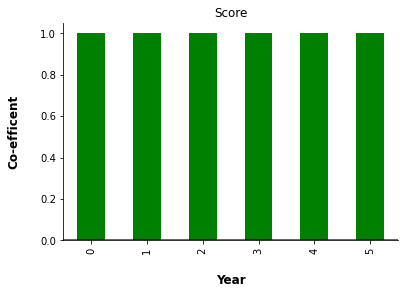

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Freedom to make life choices,-8.052286e-15,8.052286e-15,False
2016,Freedom to make life choices,8.501350e-15,8.501350e-15,True
2017,Freedom to make life choices,1.955079e-14,1.955079e-14,True
2018,Freedom to make life choices,5.172953e-16,5.172953e-16,True
2019,Freedom to make life choices,-8.541837e-16,8.541837e-16,False
9999,Freedom to make life choices,-1.374951e-15,1.374951e-15,False


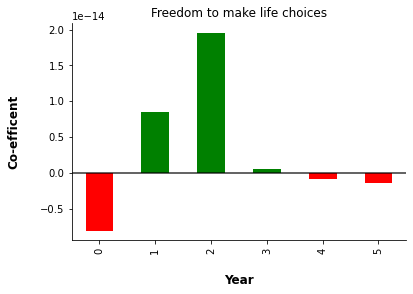

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Perceptions of corruption,6.883425e-15,6.883425e-15,True
2016,Perceptions of corruption,-7.418715e-15,7.418715e-15,False
2017,Perceptions of corruption,-1.641600e-14,1.641600e-14,False
2018,Perceptions of corruption,-2.678628e-15,2.678628e-15,False
2019,Perceptions of corruption,-9.042138e-16,9.042138e-16,False
9999,Perceptions of corruption,-7.555580e-15,7.555580e-15,False


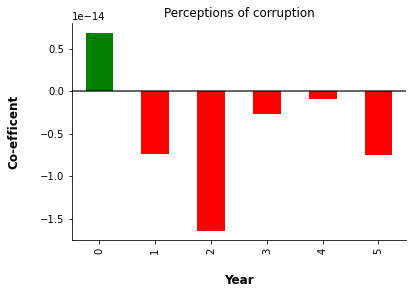

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Social support,4.974185e-15,4.974185e-15,True
2016,Social support,5.363673e-15,5.363673e-15,True
2017,Social support,-1.125545e-14,1.125545e-14,False
2018,Social support,8.460930e-16,8.460930e-16,True
2019,Social support,-5.967017e-17,5.967017e-17,False
9999,Social support,1.109595e-15,1.109595e-15,True


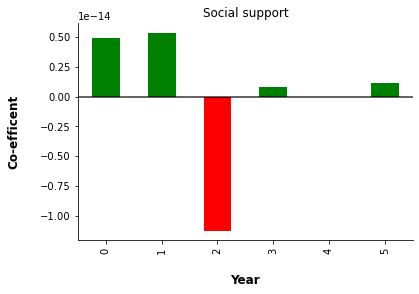

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Healthy life expectancy,-2.860420e-15,2.860420e-15,False
2016,Healthy life expectancy,-3.824292e-15,3.824292e-15,False
2017,Healthy life expectancy,1.012913e-14,1.012913e-14,True
2018,Healthy life expectancy,1.077961e-15,1.077961e-15,True
2019,Healthy life expectancy,-4.558144e-16,4.558144e-16,False
9999,Healthy life expectancy,5.739287e-16,5.739287e-16,True


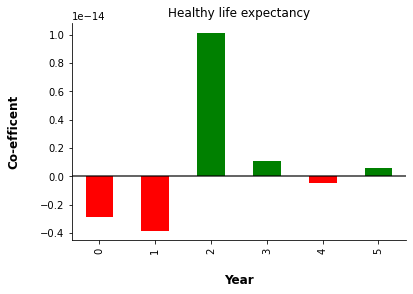

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,Generosity,2.138216e-15,2.138216e-15,True
2016,Generosity,-2.676704e-15,2.676704e-15,False
2017,Generosity,-2.584676e-15,2.584676e-15,False
2018,Generosity,2.515536e-15,2.515536e-15,True
2019,Generosity,-4.813481e-16,4.813481e-16,False
9999,Generosity,7.645862e-15,7.645862e-15,True


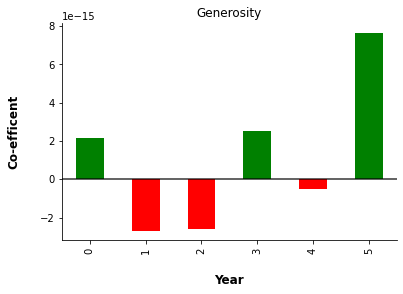

,est_int,coefs,abs_coefs,positive
Year,,,,
2015,GDP per capita,5.625086e-16,5.625086e-16,True
2016,GDP per capita,-6.231703e-16,6.231703e-16,False
2017,GDP per capita,1.795433e-15,1.795433e-15,True
2018,GDP per capita,2.005189e-15,2.005189e-15,True
2019,GDP per capita,-3.316713e-16,3.316713e-16,False
9999,GDP per capita,3.741377e-16,3.741377e-16,True


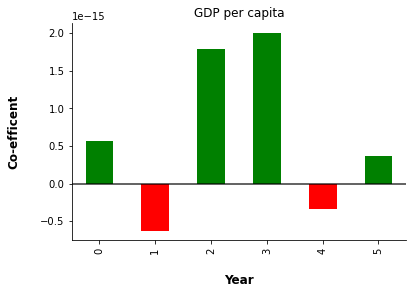

In [18]:
for est in est_:
    plot_coef(est)
    plt.show()

 The second question
 ##### By combining all the years into one dataset what are the major factors?
 
 By combining the datasets. I can plot one chart with the factors for each year

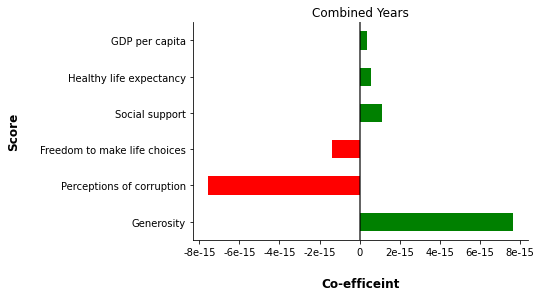

In [19]:
x = df_coef_df[df_coef_df['est_int'] != 'Score'].copy()
x = x[x['Year'] == 9999]
x['positive'] = x['coefs'] >= 0
x = x.set_index('est_int')
    
ax = x['coefs'].plot(kind='barh', color=x.positive.map({True: 'g',False: 'r'}), title='Combined Years')
     
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

    # Draw horizontal axis lines
ax.axvline(x=0, linestyle='solid', alpha=0.8, color='#000', zorder=1)
    
    # Set x-axis label
ax.set_xlabel("Co-efficeint", labelpad=20, weight='bold', size=12)
    
    # Set y-axis label
ax.set_ylabel("Score", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

###### 3  How does wealth compare to generosity and social support

I want to see further correlations between GDP per capita, generosity and Social Support.As well as how these scores were distributed.
I want to see any correlations between the variables over the years.

The heatmaps show how each factor is correlated. From these visualizations above we can see that generosrity is weakly negatively correlated to GDP per capita and social support. Social support and GDP per capita are strongly positively correlated.

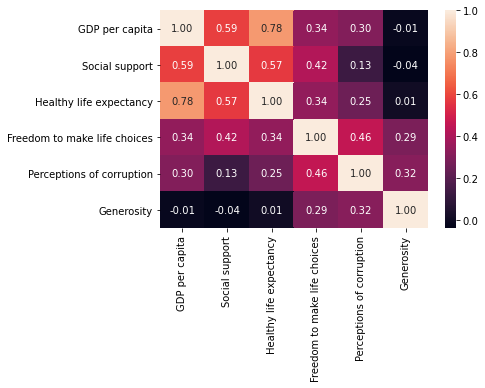

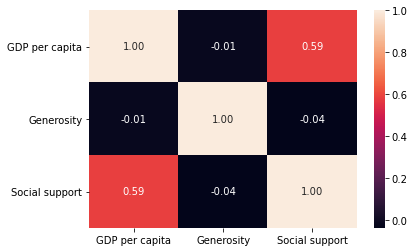

In [20]:
sns.heatmap(dfs[5].drop(columns = ['Year', 'Score']).corr(), annot=True, fmt=".2f");
plt.show()

sns.heatmap(dfs[5][['GDP per capita', 'Generosity', 'Social support']].corr(), annot=True, fmt=".2f");

Generosity is negatively correlated to to GDP per capita and social support. Social support is positively correlated to GDP per capita. This could mean that the more income a country receives the more support people receive. Which would probably be more empowering as people would be able to assist themselves. Generosity would be people relying on handouts, it would make sense that in lower income countries generosity would be more of a requirement.

## Section 5: Evaluation

  Looking at correlation it showed that generosity and GDP per capita were negatively ocrrelated. It appears that the wealthier countries put more weighting on GDP but less on generosity, whereas the lower income countries have generaosity as a major factor in their happiness score.

#### Question 1: Do the expanatory variables change in effect over time?

I discovered through the analysis that the factors did change over time. The most consistently highly weighted factor was the perception of government corruption and freedom to make life choices. The less corruption was perceived and the more freedom over life choices the better the happiness score. The 2016 dataset however stood out in that perception of corruption was the lowest factor whereas in all other years it was the highest.

#### Question 2: y combining all the years into one dataset what are the major factors?

When looking at combined dataset it appeared that those with the highest co-efficient and relationship to happiness were genrosity, freedom to make life choices and the perception of government. Generosity has a positive effect on happiness while perception of corruption has an almost equal negative effect. After that is was freedom to make life choices. Throughout each year these factors were consistent in ranking high. 

Interestingly GDP per capita has the lowest effect with the combined dataset

#### Question 3: How does wealth compare to generosity and social support.

Wealth was more commonly distributed across scores that generosity. Social support on the other hand had a distribution more towards higher scores. Looking at the correlation it appears that GDP per capita and social support are quite highle positvely correlated. Genrosity and wealth were weakly negatively correlated.

This could mean that the more income a country receives the more support people receive. Which would probably be more empowering as people would be able to assist themselves. Generosity would be people relying on handouts, it would make sense that in lower income countries generosity would be more of a requirement.